In [40]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Real_combined_file.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [4]:
df.shape

(1105, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1105 non-null   float64
 1   TM      1105 non-null   float64
 2   Tm      1105 non-null   float64
 3   H       1105 non-null   int64  
 4   VV      1105 non-null   float64
 5   V       1105 non-null   float64
 6   VM      1105 non-null   float64
 7   PM 2.5  1103 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 69.2 KB


In [13]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [7]:
df.dtypes

T         float64
TM        float64
Tm        float64
H           int64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

<AxesSubplot:>

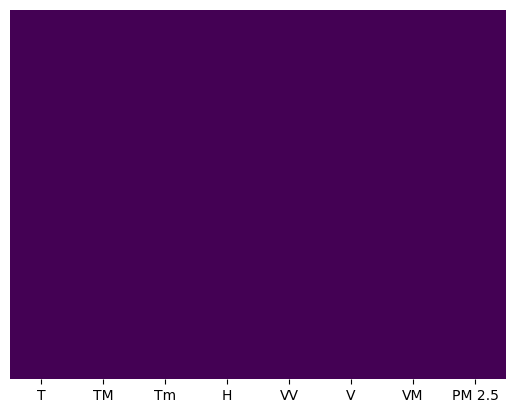

In [8]:
# Checking for null values:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
# Splitting the dataset:

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [11]:
X

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59,6.3,4.3,5.4
1,22.4,30.3,16.9,57,6.9,3.3,7.6
2,24.0,31.8,16.9,51,6.9,2.8,5.4
3,22.8,30.2,17.6,55,7.7,3.7,7.6
4,23.1,30.6,17.4,46,6.9,3.3,5.4
...,...,...,...,...,...,...,...
1098,22.2,27.7,17.7,63,6.9,2.8,7.6
1099,22.7,28.4,18.1,65,6.3,3.9,5.4
1100,23.4,29.1,18.4,62,6.0,5.7,9.4
1101,23.8,30.2,17.7,56,5.5,6.1,9.4


In [12]:
y

0       284.795833
1       219.720833
2       182.187500
3       154.037500
4       223.208333
           ...    
1098    188.041667
1099    310.250000
1100    204.375000
1101    223.250000
1102    248.958333
Name: PM 2.5, Length: 1103, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor()

In [32]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
print("Coefficient of determination >> on train data :  {}".format(rf.score(X_train,y_train)))

Coefficient of determination >> on train data :  0.9188506057374781


In [34]:
print("Coefficient of determination >> on test data :  {}".format(rf.score(X_test,y_test)))

Coefficient of determination >> on test data :  0.38706887784302024


In [35]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rf,X,y,cv=5)

score.mean()

0.3250353746181533

In [36]:
prediction = rf.predict(X_test)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

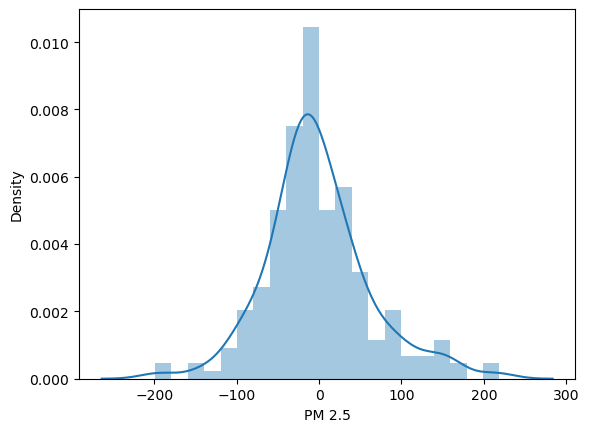

In [38]:
sns.distplot(y_test-prediction)

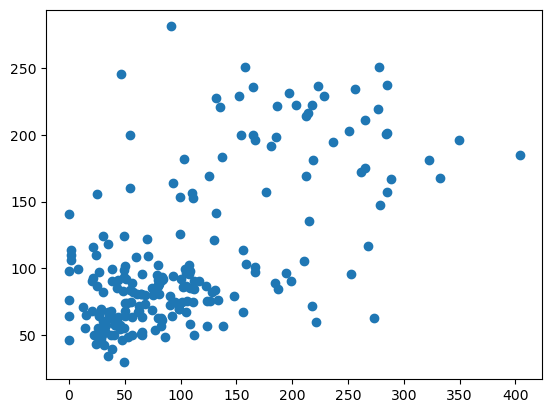

In [41]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning:

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
[int(x) for x in np.linspace(start=200, stop=1200, num=9)]

[200, 325, 450, 575, 700, 825, 950, 1075, 1200]

In [46]:
# Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=200, stop=1200, num=9)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 500, 8)]
min_samples_split = [5,10,15,20,30,50]
min_samples_leaf = [1,3,4,5,7,8,10]

In [58]:
# Create a random grid:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' : ['poisson', 'friedman_mse', 'squared_error', 'absolute_error']
}

In [59]:
print(random_grid)

{'n_estimators': [200, 325, 450, 575, 700, 825, 950, 1075, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 80, 150, 220, 290, 360, 430, 500], 'min_samples_split': [5, 10, 15, 20, 30, 50], 'min_samples_leaf': [1, 3, 4, 5, 7, 8, 10], 'criterion': ['poisson', 'friedman_mse', 'squared_error', 'absolute_error']}


In [60]:
rf = RandomForestRegressor()

In [61]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter=150, cv=5, verbose=2, n_jobs=-1, random_state=101)

In [62]:
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\kshit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kshit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kshit\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\kshit\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kshit\anaconda3\lib\site-packag

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'criterion': ['poisson', 'friedman_mse',
                                                      'squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 80, 150, 220, 290,
                                                      360, 430, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 5, 7, 8,
                                                             10],
                                        'min_samples_split': [5, 10, 15, 20, 30,
                                                              50],
                                        'n_estimators': [200, 325, 450, 575,
                                                         700, 825, 950, 1075,
                                                         1200]},
                   random_state=101, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
rf_randomcv.best_params_

{'n_estimators': 825,
 'min_samples_split': 15,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'squared_error'}

In [64]:
rf_randomcv.best_score_

-3777.142655315104

In [65]:
prediction = rf_randomcv.predict(X_test)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

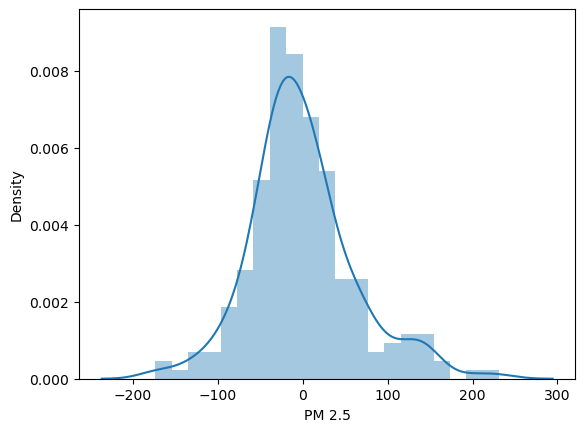

In [66]:
sns.distplot(y_test-prediction)

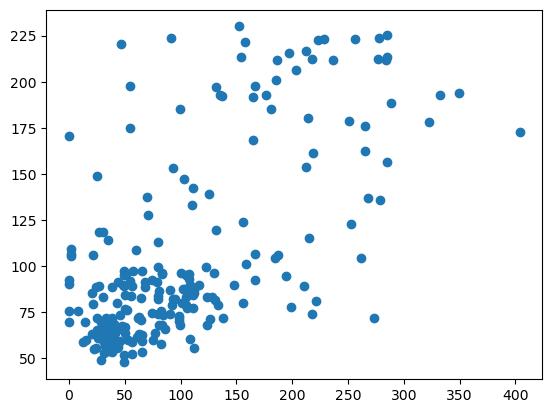

In [67]:
plt.scatter(y_test,prediction)

In [68]:
from sklearn import metrics

In [71]:
print('MAE : ', metrics.mean_absolute_error(y_test, prediction))
print('MSE : ', metrics.mean_squared_error(y_test, prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE :  45.7129032335133
MSE :  3812.6090586274404
RMSE :  61.746328300777854


In [72]:
metrics.r2_score(y_test, prediction)

0.4177442565274978

In [74]:
# Exporting the model:

import pickle

file = open('Random_forest_model.pkl', 'wb')
pickle.dump(rf_randomcv, file)